<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Histogram**


Estimated time needed: **45** minutes


In this lab, you will focus on the visualization of data. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


In this lab, you will perform the following:


- Visualize the distribution of data using histograms.

- Visualize relationships between features.

- Explore data composition and comparisons.


## Demo: Working with database


#### Download the database file.


In [13]:
!wget -O survey-data.sqlite https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite

--2025-04-08 20:58:26--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 211415040 (202M) [application/octet-stream]
Saving to: ‘survey-data.sqlite’

survey-data.sqlite  100%[===================>] 201.62M  39.6MB/s    in 4.9s    

2025-04-08 20:58:31 (40.8 MB/s) - ‘survey-data.sqlite’ saved [211415040/211415040]



#### Install the required libraries and import them


In [14]:
!pip install pandas

In [15]:
!pip install matplotlib

In [16]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
!pip install seaborn
import seaborn as sns

#### Connect to the SQLite database


In [18]:
conn = sqlite3.connect('survey-data.sqlite')

## Demo: Basic SQL queries

**Demo 1: Count the number of rows in the table**


In [19]:
QUERY = "SELECT COUNT(*) FROM main"
df = pd.read_sql_query(QUERY, conn)
print(df)


   COUNT(*)
0     65437


**Demo 2: List all tables**


In [20]:
QUERY = """
SELECT name as Table_Name 
FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


**Demo 3: Group data by age**


In [21]:
QUERY = """
SELECT Age, COUNT(*) as count 
FROM main 
GROUP BY Age 
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)
df_age.head()

                  Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568


,Age,count
0,18-24 years old,14098
1,25-34 years old,23911
2,35-44 years old,14942
3,45-54 years old,6249
4,55-64 years old,2575


## Hands-on Lab: Visualizing Data with Histograms


### 1. Visualizing the distribution of data (Histograms)


**1.1 Histogram of `CompTotal` (Total Compensation)**


Objective: Plot a histogram of `CompTotal` to visualize the distribution of respondents' total compensation.


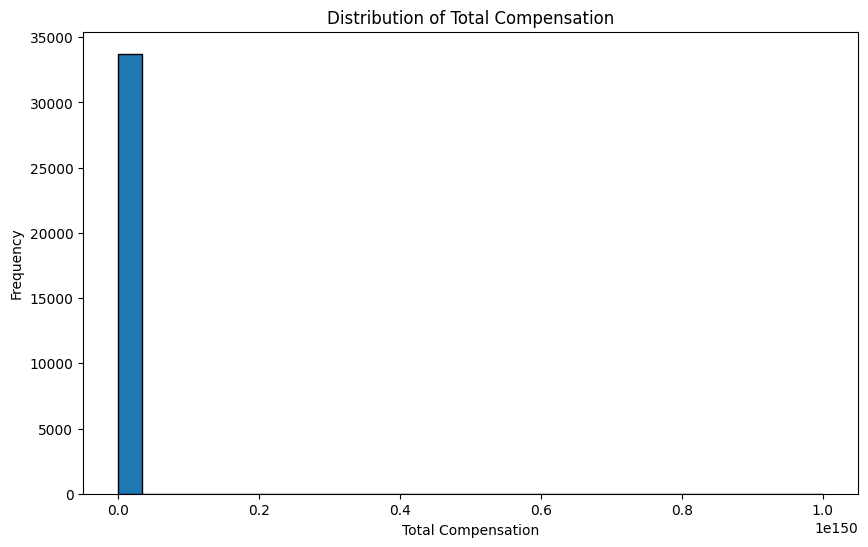

In [22]:

QUERY = "SELECT CompTotal FROM main WHERE CompTotal IS NOT NULL"
df = pd.read_sql_query(QUERY, conn)

plt.figure(figsize=(10, 6))
plt.hist(df['CompTotal'], bins=30, edgecolor='black')
plt.title('Distribution of Total Compensation')
plt.xlabel('Total Compensation')
plt.ylabel('Frequency')
plt.show()

**1.2 Histogram of YearsCodePro (Years of Professional Coding Experience)**


Objective: Plot a histogram of `YearsCodePro` to analyze the distribution of coding experience among respondents.


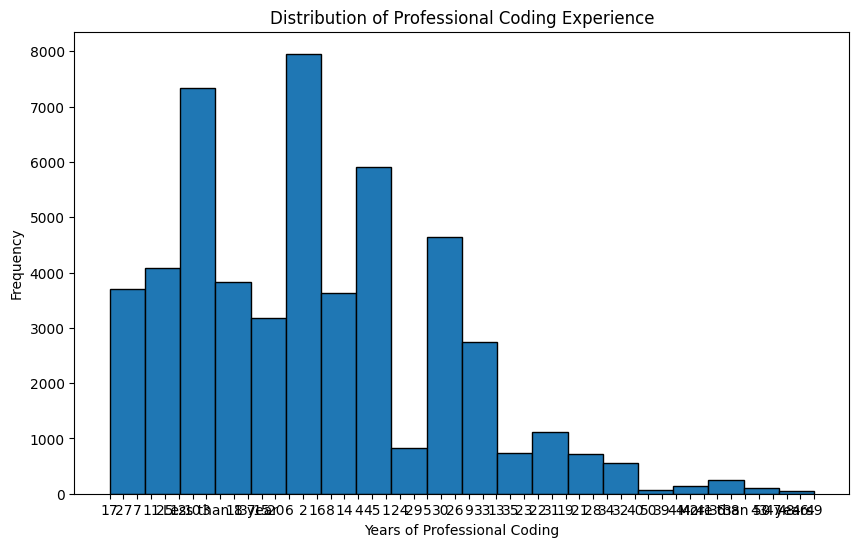

In [23]:
## Write your code here
QUERY = "SELECT YearsCodePro FROM main WHERE YearsCodePro IS NOT NULL"
df = pd.read_sql_query(QUERY, conn)

plt.figure(figsize=(10, 6))
plt.hist(df['YearsCodePro'], bins=20, edgecolor='black')
plt.title('Distribution of Professional Coding Experience')
plt.xlabel('Years of Professional Coding')
plt.ylabel('Frequency')
plt.show()

### 2. Visualizing Relationships in Data


**2.1 Histogram Comparison of `CompTotal` by `Age` Group**


Objective: Use histograms to compare the distribution of CompTotal across different Age groups.


/tmp/ipykernel_1159/4162279302.py:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


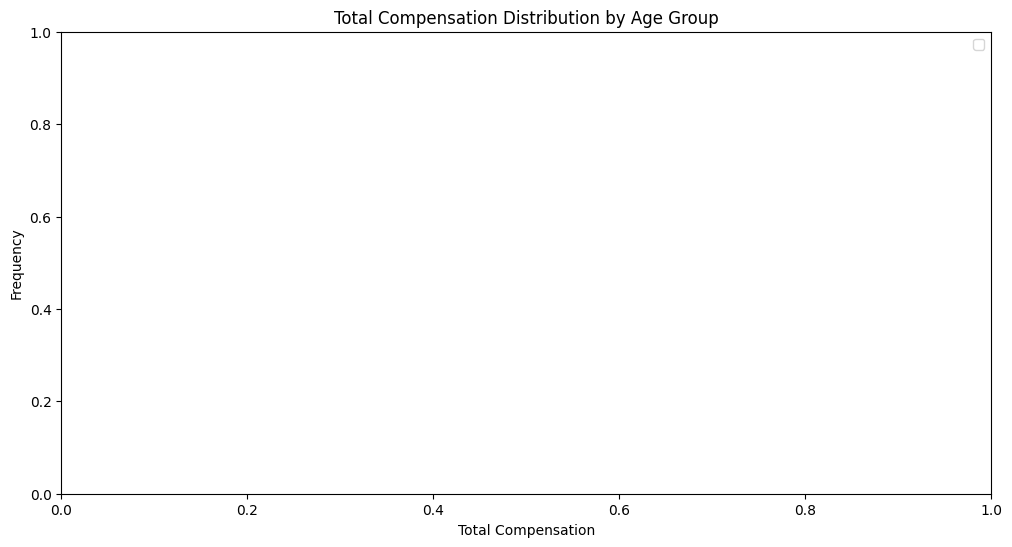

In [24]:
QUERY = """
SELECT Age, CompTotal 
FROM main 
WHERE CompTotal IS NOT NULL AND Age IS NOT NULL
"""
df = pd.read_sql_query(QUERY, conn)

# Convert Age to numeric, removing any non-numeric values
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

# Remove rows with NaN ages
df = df.dropna(subset=['Age'])

# Create age groups
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 25, 35, 45, 55, 100], labels=['18-25', '26-35', '36-45', '46-55', '55+'])

plt.figure(figsize=(12, 6))
for age_group in df['AgeGroup'].unique():
    subset = df[df['AgeGroup'] == age_group]
    plt.hist(subset['CompTotal'], bins=30, alpha=0.5, label=age_group, edgecolor='black')

plt.title('Total Compensation Distribution by Age Group')
plt.xlabel('Total Compensation')
plt.ylabel('Frequency')
plt.legend()
plt.show()


**2.2 Histogram of TimeSearching for Different Age Groups**


Objective: Use histograms to explore the distribution of `TimeSearching` (time spent searching for information) for respondents across different age groups.


/tmp/ipykernel_1159/1744376500.py:27: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


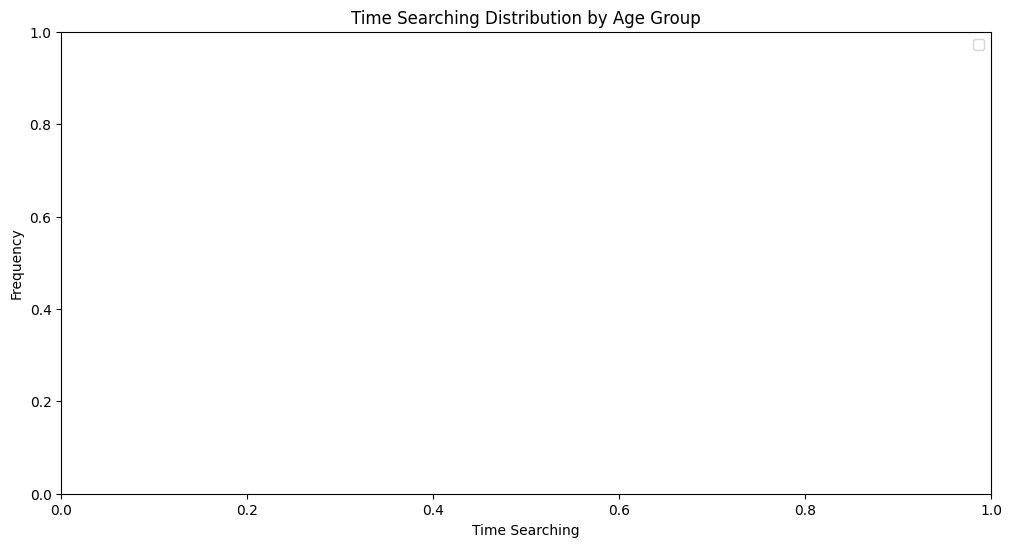

In [25]:
## Write your code here
QUERY = """
SELECT Age, TimeSearching 
FROM main 
WHERE TimeSearching IS NOT NULL AND Age IS NOT NULL
"""
df = pd.read_sql_query(QUERY, conn)

# Convert Age and TimeSearching to numeric, removing any non-numeric values
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df['TimeSearching'] = pd.to_numeric(df['TimeSearching'], errors='coerce')

# Remove rows with NaN ages or TimeSearching
df = df.dropna(subset=['Age', 'TimeSearching'])

# Create age groups
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 25, 35, 45, 55, 100], labels=['18-25', '26-35', '36-45', '46-55', '55+'])

plt.figure(figsize=(12, 6))
for age_group in df['AgeGroup'].unique():
    subset = df[df['AgeGroup'] == age_group]
    plt.hist(subset['TimeSearching'], bins=20, alpha=0.5, label=age_group, edgecolor='black')

plt.title('Time Searching Distribution by Age Group')
plt.xlabel('Time Searching')
plt.ylabel('Frequency')
plt.legend()
plt.show()


### 3. Visualizing the Composition of Data


**3.1 Histogram of Most Desired Databases (`DatabaseWantToWorkWith`)**


Objective: Visualize the most desired databases for future learning using a histogram of the top 5 databases.


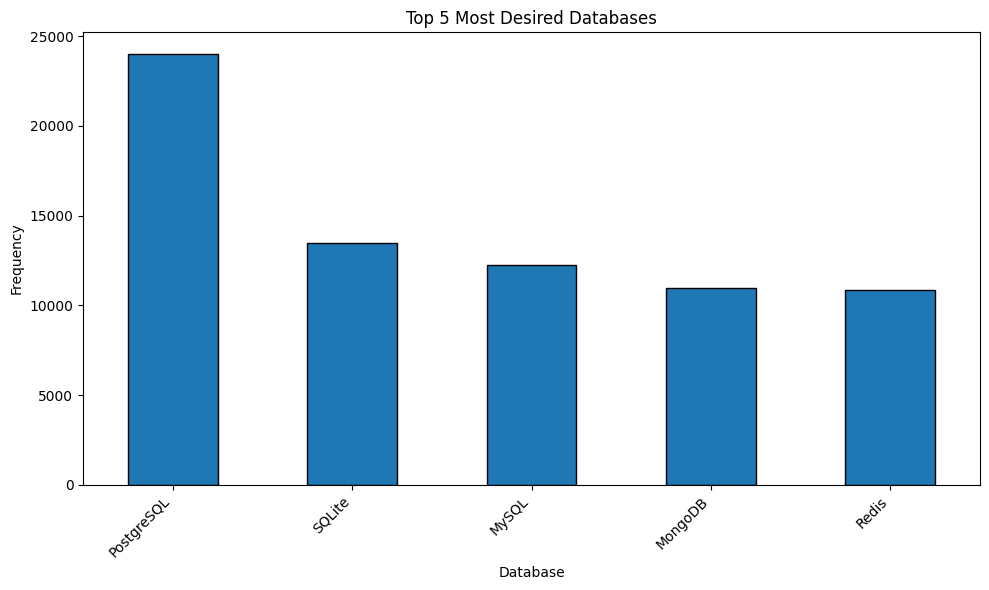

In [26]:
## Write your code here
QUERY = """
SELECT DatabaseWantToWorkWith 
FROM main 
WHERE DatabaseWantToWorkWith IS NOT NULL AND DatabaseWantToWorkWith != ''
"""
df = pd.read_sql_query(QUERY, conn)

# Split multiple databases and count frequencies
databases = df['DatabaseWantToWorkWith'].str.split(';', expand=True).stack()
top_databases = databases.value_counts().head(5)

plt.figure(figsize=(10, 6))
top_databases.plot(kind='bar', edgecolor='black')
plt.title('Top 5 Most Desired Databases')
plt.xlabel('Database')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**3.2 Histogram of Preferred Work Locations (`RemoteWork`)**


Objective: Use a histogram to explore the distribution of preferred work arrangements (`remote work`).


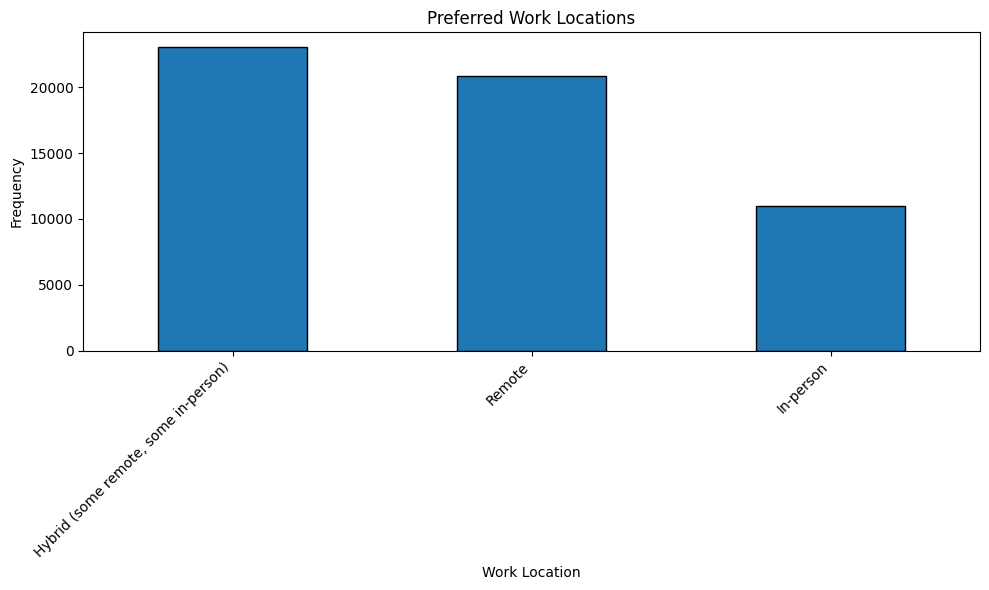

In [27]:
## Write your code here
QUERY = "SELECT RemoteWork FROM main WHERE RemoteWork IS NOT NULL"
df = pd.read_sql_query(QUERY, conn)

plt.figure(figsize=(10, 6))
df['RemoteWork'].value_counts().plot(kind='bar', edgecolor='black')
plt.title('Preferred Work Locations')
plt.xlabel('Work Location')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### 4. Visualizing Comparison of Data


**4.1 Histogram of Median CompTotal for Ages 45 to 60**


Objective: Plot the histogram for `CompTotal` within the age group 45 to 60 to analyze compensation distribution among mid-career respondents.


In [31]:
## Write your code here
QUERY = """
SELECT CompTotal 
FROM main 
WHERE CompTotal IS NOT NULL AND Age BETWEEN 45 AND 60
"""
df = pd.read_sql_query(QUERY, conn)

plt.figure(figsize=(10, 6))
plt.hist(df['CompTotal'], bins=30, edgecolor='black')
plt.title('Total Compensation Distribution (Ages 45-60)')
plt.xlabel('Total Compensation')
plt.ylabel('Frequency')
plt.show()

ProgrammingError: Cannot operate on a closed database.

**4.2 Histogram of Job Satisfaction (`JobSat`) by YearsCodePro**


Objective: Plot the histogram for `JobSat` scores based on respondents' years of professional coding experience.


In [29]:
## Write your code here

### Final step: Close the database connection


Once you've completed the lab, make sure to close the connection to the SQLite database:



In [30]:
conn.close()

### Summary


In this lab, you used histograms to visualize various aspects of the dataset, focusing on:

- Distribution of compensation, coding experience, and work hours.

- Relationships in compensation across age groups and work status.

- Composition of data by desired databases and work environments.

- Comparisons of job satisfaction across years of experience.

Histograms helped reveal patterns and distributions in the data, enhancing your understanding of developer demographics and preferences.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
